## $$不用框架入门进阶深度学习(3)-线性单元、梯度下降与回归任务$$
### 一、实现线性单元

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
class Perceptron(object):
    def __init__(self, input_feature_num, activation=None):
        self.activation = activation if activation else self.sign
        self.w = [0.0] * input_feature_num
        self.b = 0.0

    def predict(self, x):
        '''
        预测输出函数:
        y_hat = f(wx + b)
        '''
        return self.activation(
            np.dot(self.w, x) + self.b)
    
    def sign(self, z):
        '''
        阶跃激活函数:
        sign(z) = 1 if z > 0
        sign(z) = 0 if z <= 0
        '''
        return int(z>0)
        
    def fit(self, x_train, y_train, iteration=10, learning_rate=0.1):
        # 训练函数
        for _ in range(iteration):
            for x, y in zip(x_train, y_train):
                y_hat = self.predict(x)
                self._update_weights(x, y, y_hat, learning_rate)
            print(self)
    
    def _update_weights(self, x, y, y_hat, learning_rate):
        # 权重更新, 对照公式查看
        delta = y - y_hat
        self.w = np.add(self.w,
                        np.multiply(learning_rate * delta, x))
        self.b += learning_rate * delta
    
    def __str__(self):
        return 'weights: {}\tbias: {}'.format(self.w, self.b)

In [34]:
class LinearUnit(Perceptron):
    def __init__(self, input_feature_num, activation=None):
        self.activation = activation if activation else self.f
        Perceptron.__init__(self, input_feature_num, self.activation)

    def f(self, x):
        return x

### 二、数据准备

In [66]:
def get_training_dataset():
    '''
    捏造5个人的工作年限与对应的收入数据
    '''
    # 输入列表，每一项表示工作年限
    x_train = [[5], [3], [8], [1.4], [10.1]]
    # 期望的输出列表，月薪，注意要与输入一一对应
    y_train = [5500, 2300, 7600, 1800, 11400]
    return x_train, y_train

def get_test_dataset():
    '''
    捏造5个人的工作年限，用模型预测结果
    '''
    # 输入列表，每一项表示工作年限
    x_test = [[1], [2], [4.3], [6.7], [9]]
    return x_test
    

### 三、模型训练-小试调参

weights: [-4326.49316]	bias: -649.9716000000001
weights: [-74.82155746]	bias: -757.2491525913629
weights: [ 626.91513987]	bias: -774.9552697355447
weights: [ 742.73650107]	bias: -777.8776572877448
weights: [ 761.85277041]	bias: -778.359996184279
weights: [ 765.00790301]	bias: -778.4396060262171
weights: [ 765.52865639]	bias: -778.4527455987852
weights: [ 765.61460653]	bias: -778.4549142799826
weights: [ 765.62879256]	bias: -778.4552722199463
weights: [ 765.63113396]	bias: -778.4553312977931


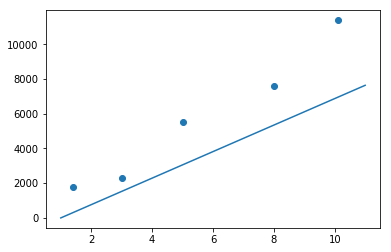

In [61]:
'''
学习率为0.1，收敛不到最优
'''
x_train, y_train = get_training_dataset()
lu = LinearUnit(len(x_train[0]))
lu.fit(x_train, y_train, iteration=10, learning_rate=0.1)

plt.scatter(x_train, y_train)
x_points = np.linspace(1, 11, 10)
y_ = (lu.w[0] * x_points + lu.b)
plt.plot(x_points, y_)

weights: [ 1124.08845147]	bias: 165.26044668
weights: [ 1117.23624693]	bias: 154.8423193732754
weights: [ 1118.1773386]	bias: 145.76193688248156
weights: [ 1119.05257625]	bias: 136.79587694940918
weights: [ 1119.91636505]	bias: 127.95091539946986
weights: [ 1120.76849022]	bias: 119.22535999327847
weights: [ 1121.60911176]	bias: 110.61759915016577
weights: [ 1122.43838495]	bias: 102.12604264670297
weights: [ 1123.25646299]	bias: 93.74912173015186
weights: [ 1124.06349703]	bias: 85.48528882583837


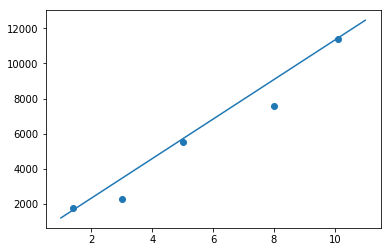

In [71]:
'''
学习率为0.01,收敛效果远远好于学习率为0.1
'''
lu = LinearUnit(len(x_train[0]))
lu.fit(x_train, y_train, iteration=10, learning_rate=0.01)

plt.scatter(x_train, y_train)
x_points = np.linspace(1, 11, 10)
y_ = (lu.w[0] * x_points + lu.b)
plt.plot(x_points, y_)

### 四、预测工资收入

In [72]:
x_test = get_test_dataset()
print(x_test)

[[1], [2], [4.3], [6.7], [9]]


In [73]:
prediction = []
for t in x_test:
    prediction.append(lu.predict(t))
    print('预测工作{}年的AI工程师\t月薪{}'.format(t, prediction[-1]))

预测工作[1]年的AI工程师	月薪1209.5487858520605
预测工作[2]年的AI工程师	月薪2333.6122828782827
预测工作[4.3]年的AI工程师	月薪4918.958326038593
预测工作[6.7]年的AI工程师	月薪7616.710718901527
预测工作[9]年的AI工程师	月薪10202.056762061839
